# Analyzing Seattle Housing Data using Linear Regression

We are looking at housing data from homes which come from the King County area in Seattle.  Using this data I am trying to interpret which features effect the price of a home in this area the most in order to gain insight into the market.

In [1]:
import pandas as pd
import numpy as np
import pylab
import math
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy import stats

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
df = pd.read_csv('data/kc_house_data.csv')

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [8]:
#taking a look into data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
#looking at the data to see if anything stands out within the interquartile ranges as well as max, min, and mean.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning the data.

In [10]:
df.drop('sqft_basement', inplace = True, axis = 1)

In [11]:
#checking to see it worked.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [12]:
df.index = pd.to_datetime(df['date'])

In [13]:
df = df.drop(columns = 'date')

In [14]:
#Dropping all NaN values.
df = df.dropna(axis = 0)

In [15]:
#check for nulls
display(df.isnull().any())
df.shape

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

(15762, 19)

In [16]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
#looking to see that the shape is smaller from dropped values.
df.shape

(15762, 19)

In [18]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,
2014-12-09,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
2014-05-12,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,0.0,98053,47.6561,-122.005,4760,101930
2014-06-27,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,0.0,98003,47.3097,-122.327,2238,6819


## Exploring the data for further cleaning:
I am looking at histograms of all of the columns to see what looks like it is going to be categorical, continuous, and to see if any shapes are different from the normal distribution therefore requiring further attention.  Right away we can see that the price, bedrooms, bathrooms, condition, yr_renovated, ext., all have heavy skews implying that there are some outliers that would prevent us from having normally distributed data.


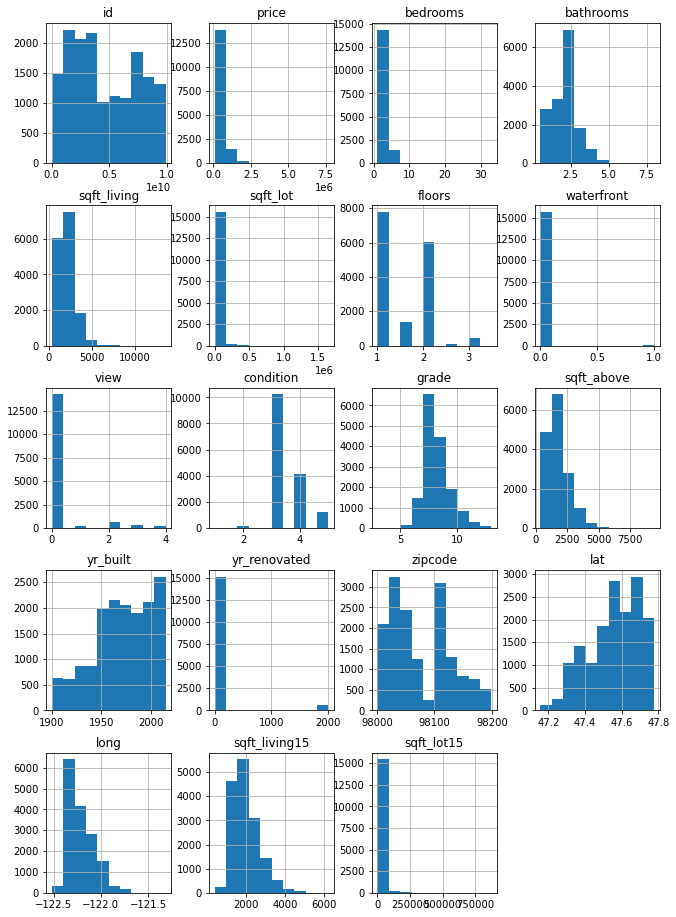

In [19]:
df.hist(figsize = (11,16))
plt.show()

### Separating out by continuous and categorical data.
Below is code for separating out the columns to find out what is categorical and what is quatitative.  

In [20]:
conts= []
cats= []
for col in df.columns:
    if (df[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [21]:
df_conts = df.loc[:,conts]

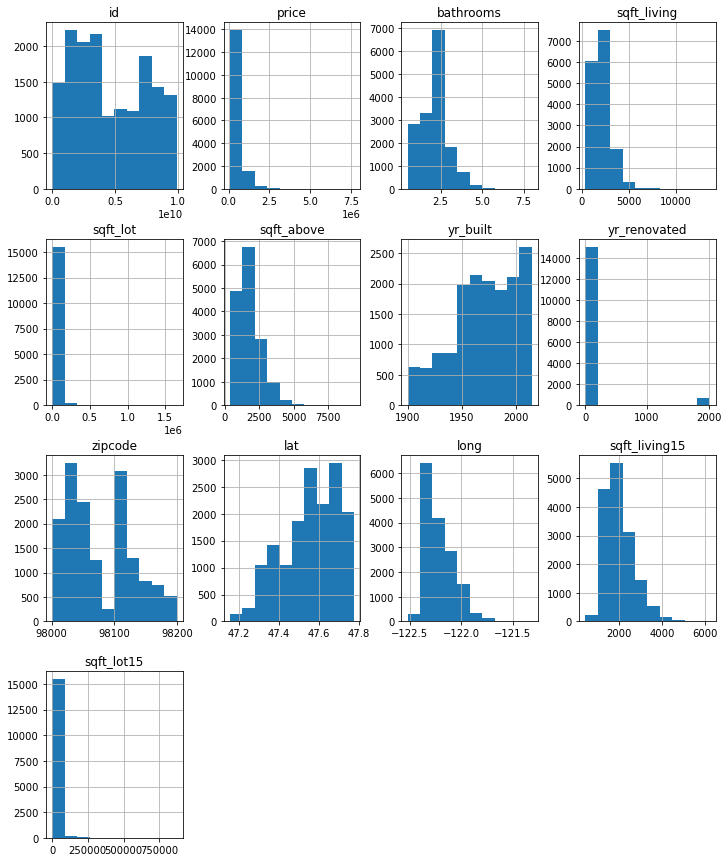

In [22]:
df_conts.hist(figsize = (12,15))
plt.show()

In [23]:
df_cats = df.loc[:,cats]

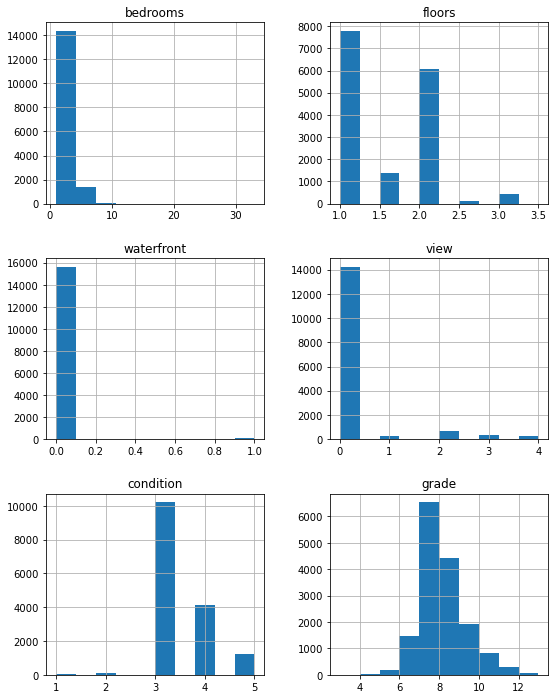

In [24]:
df_cats.hist(figsize = (9,12))
plt.show()

In [25]:
list(df_conts.columns)

['id',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [26]:
#I am going to use these as the columns that I get dummies for.
list(df_cats.columns)

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

## Removing outliers
I really wanted to use a z score because of the fact that it is more agressive and requires less time picking through individual columns.  This data set was large enough that I was able to use the z score method with a little additional cleaning.

### yr_renovated
yr_renovated is an important column for this expoloratory analysis. However because most of the homes have not been renovated they are marked with 0 and therefore it is hard to make this appear as continuous data with out splitting up the data frame. It also becomes thrown off when put into a z score. This means for the final model I think I am going to end up dropping this column and exploring the data associated with this column in separate notebooks.

In [27]:
#z score method is always more aggressive but most effective
#histograms of continuous columns show how removing outliers changes distribution

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

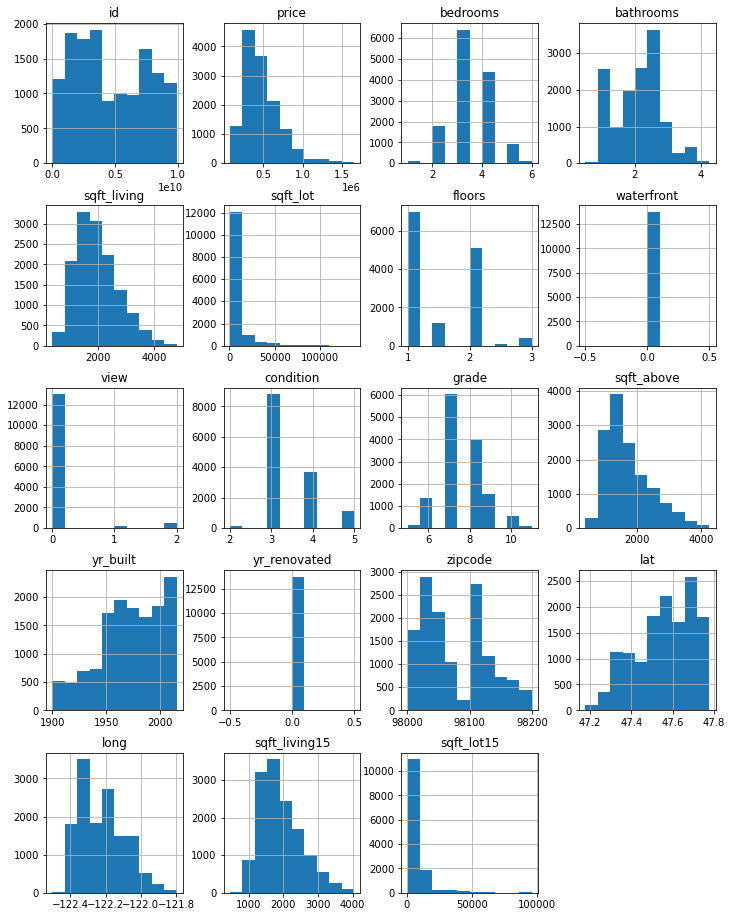

In [28]:
df.hist(figsize = (12,16))
plt.show()

In [29]:
df.shape

(13724, 19)

# Exploratory Data Analysis

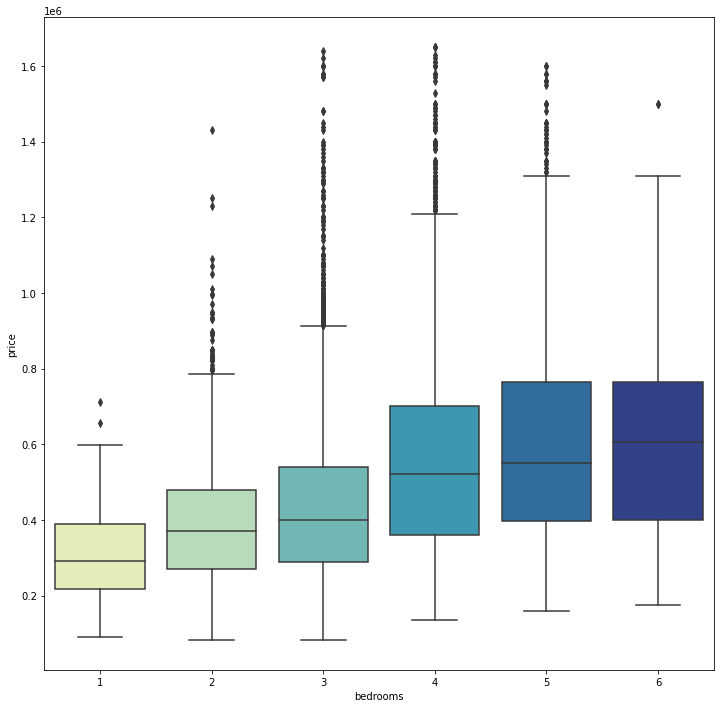

In [30]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 12))

sns.boxplot(data = df, x = 'bedrooms', y = 'price', palette = 'YlGnBu')
plt.show()

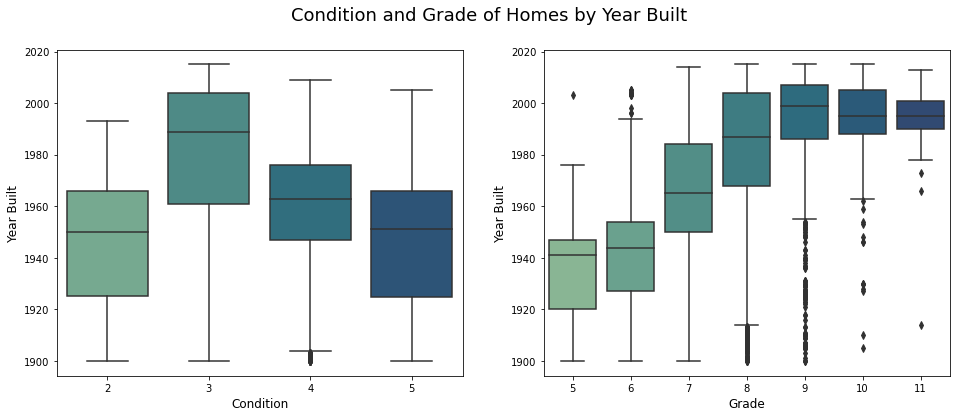

In [31]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
fig.suptitle('Condition and Grade of Homes by Year Built', fontsize = 18)

sns.boxplot(ax = axes[0], data = df, x = 'condition', y = 'yr_built', palette = 'crest' )
sns.boxplot(ax = axes[1], data = df, x = 'grade', y = 'yr_built', palette = 'crest')

axes[0].set_xlabel('Condition', fontsize = 12)
axes[0].set_ylabel('Year Built', fontsize = 12)
axes[1].set_xlabel('Grade', fontsize = 12)
axes[1].set_ylabel('Year Built', fontsize = 12)

plt.show()

I had to look into why there is a difference in Condition v. Grade.  One would think these ratings would align, however they do not.  To dig deeper on this I used an article from a blog called Appraisal Buzz to gain some insight:

"The tricky part is when style and tastes change over decades. A comparable with the typical décor from 1980 with the cream laminate cabinets with wood trim, which were in style at the time, is considered to be average construction quality. Based on today’s trends, these cabinets look very dated. They may still be in very good condition, but they are average quality(in our case grade). The quality(grade) rating doesn’t change over time. Quality is quality. In contrast, condition may erode over time if not maintained." [1]

What this says about the two graphs above is that homes in the 2000s may be built up to the standards of taste and current with the time but they are not built to withstand corrosion or decomposition over time.  This does define the house of the 2000s, flashy but trashy.

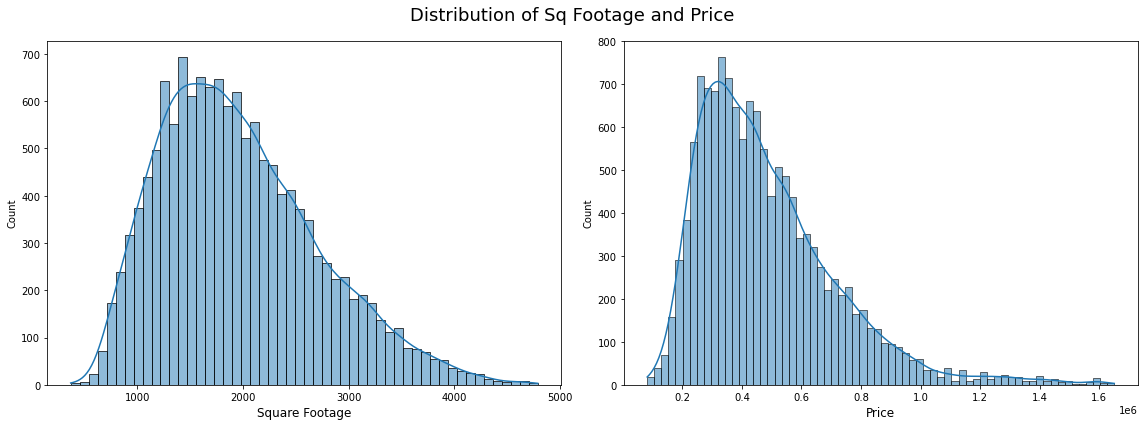

In [32]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
fig.suptitle('Distribution of Sq Footage and Price', fontsize = 18)

sns.histplot(ax = axes[0], data = df, x = 'sqft_living', kde = True)
sns.histplot(ax = axes[1], data = df, x = 'price', kde = True)
#kde = kernel density estimate, aka the distribution line

axes[0].set_xlabel('Square Footage', fontsize = 12)
axes[1].set_xlabel('Price', fontsize = 12)

plt.tight_layout()
plt.show()
#We could probably do some custom data cleaning to get rid of the right skew in these hsitograms.

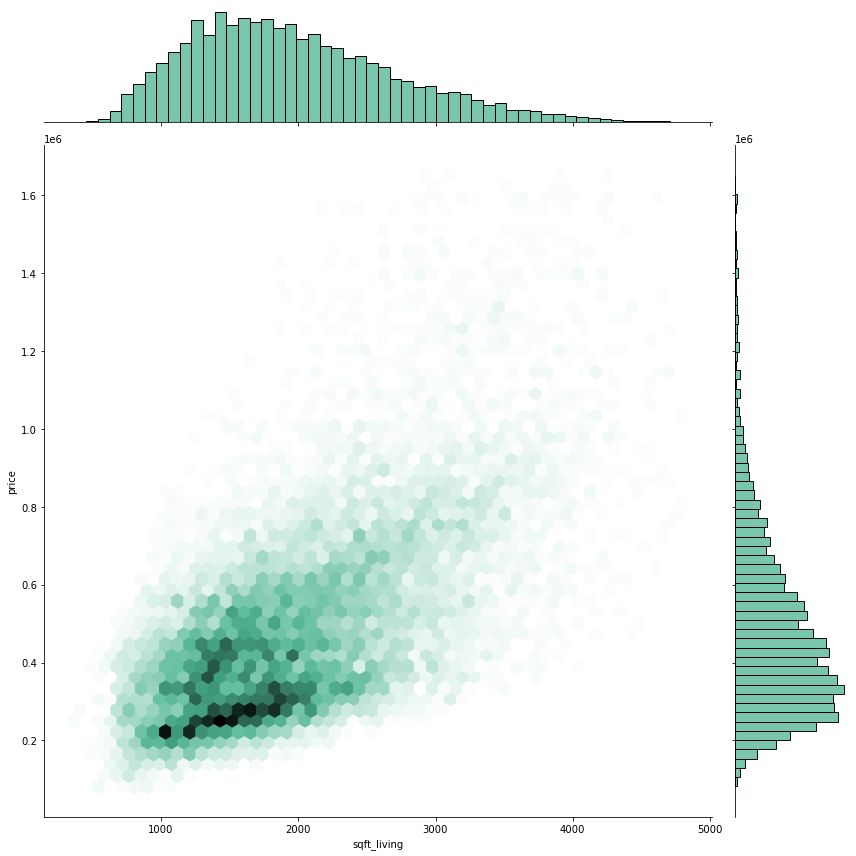

In [33]:
sns.jointplot(data = df, x= 'sqft_living', y= 'price', kind="hex", color="#4CB391", height=12)

## Interactive Heatmap

In [34]:
import folium
kc_coordinates = (47.54, -121.98)
kc_map = folium.Map(location = kc_coordinates)

In [35]:
from folium.plugins import HeatMap
import branca.colormap as cm
from collections import defaultdict
import webbrowser

steps=20
colormap = cm.linear.YlOrRd_09.scale(0, 1).to_step(steps)
gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
colormap.add_to(kc_map) 

    
HeatMap(data = df.groupby(['price']).median()[['lat', 'long']].values.tolist(), gradient = gradient_map).add_to(kc_map)

🔔 **Please Note** 

When this heat map first runs it shows the entirety of the vicinity.  Therefore, scroll in to see specific areas and the heat map of homes by price.  Red will be the most expensive and yellow the least.

In [36]:
display(kc_map)

# Data Preparation for the Model

##  Correlation and Multicollinearity.

In [37]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.002103,0.010158,0.029897,0.021317,-0.118189,0.032503,NaN,0.019919,-0.029400,0.033633,0.026770,0.038664,NaN,-0.019391,-0.013680,0.050120,0.022516,-0.110257
price,0.002103,1.000000,0.307282,0.445645,0.627371,0.099006,0.273268,NaN,0.195505,0.050880,0.636901,0.535921,0.063676,NaN,-0.040487,0.429493,0.076473,0.553979,0.091380
bedrooms,0.010158,0.307282,1.000000,0.491848,0.613787,0.114475,0.158953,NaN,0.048182,0.022281,0.341140,0.485935,0.176054,NaN,-0.172980,-0.039415,0.178512,0.412335,0.117993
bathrooms,0.029897,0.445645,0.491848,1.000000,0.709140,0.059099,0.514080,NaN,0.066472,-0.145309,0.619367,0.628483,0.582368,NaN,-0.226793,-0.001226,0.284427,0.539058,0.065158
sqft_living,0.021317,0.627371,0.613787,0.709140,1.000000,0.231026,0.348100,NaN,0.135294,-0.069404,0.714134,0.850045,0.365070,NaN,-0.223851,0.033990,0.312916,0.751380,0.235187
sqft_lot,-0.118189,0.099006,0.114475,0.059099,0.231026,1.000000,-0.105253,NaN,0.028517,0.046079,0.141615,0.205397,0.017849,NaN,-0.180536,-0.051435,0.271369,0.271223,0.817852
floors,0.032503,0.273268,0.158953,0.514080,0.348100,-0.105253,1.000000,NaN,-0.022001,-0.286539,0.466357,0.539260,0.531758,NaN,-0.066477,0.044664,0.156409,0.276374,-0.108478
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.019919,0.195505,0.048182,0.066472,0.135294,0.028517,-0.022001,NaN,1.000000,0.040376,0.113416,0.048599,-0.063688,NaN,0.078877,0.009735,-0.070015,0.151508,0.018097
condition,-0.029400,0.050880,0.022281,-0.145309,-0.069404,0.046079,-0.286539,NaN,0.040376,1.000000,-0.180546,-0.181787,-0.403117,NaN,-0.001660,-0.015314,-0.101743,-0.119648,0.057708


In [38]:
print(df.yr_renovated.unique())
print(df.waterfront.unique())

[0.]
[0.]


In [39]:
df = df.drop(columns= ['yr_renovated', 'waterfront'], axis = 1)

Checking the correlation between columns. The Waterfront and yr_renovated columns ended up becoming NaN columns when passed through a correlation matrix
This is due to the z score outlier removal method.  
Since all of these values are now 0, there is no correlation and therefore a NaN value.

In [40]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.002103,0.010158,0.029897,0.021317,-0.118189,0.032503,0.019919,-0.029400,0.033633,0.026770,0.038664,-0.019391,-0.013680,0.050120,0.022516,-0.110257
price,0.002103,1.000000,0.307282,0.445645,0.627371,0.099006,0.273268,0.195505,0.050880,0.636901,0.535921,0.063676,-0.040487,0.429493,0.076473,0.553979,0.091380
bedrooms,0.010158,0.307282,1.000000,0.491848,0.613787,0.114475,0.158953,0.048182,0.022281,0.341140,0.485935,0.176054,-0.172980,-0.039415,0.178512,0.412335,0.117993
bathrooms,0.029897,0.445645,0.491848,1.000000,0.709140,0.059099,0.514080,0.066472,-0.145309,0.619367,0.628483,0.582368,-0.226793,-0.001226,0.284427,0.539058,0.065158
sqft_living,0.021317,0.627371,0.613787,0.709140,1.000000,0.231026,0.348100,0.135294,-0.069404,0.714134,0.850045,0.365070,-0.223851,0.033990,0.312916,0.751380,0.235187
sqft_lot,-0.118189,0.099006,0.114475,0.059099,0.231026,1.000000,-0.105253,0.028517,0.046079,0.141615,0.205397,0.017849,-0.180536,-0.051435,0.271369,0.271223,0.817852
floors,0.032503,0.273268,0.158953,0.514080,0.348100,-0.105253,1.000000,-0.022001,-0.286539,0.466357,0.539260,0.531758,-0.066477,0.044664,0.156409,0.276374,-0.108478
view,0.019919,0.195505,0.048182,0.066472,0.135294,0.028517,-0.022001,1.000000,0.040376,0.113416,0.048599,-0.063688,0.078877,0.009735,-0.070015,0.151508,0.018097
condition,-0.029400,0.050880,0.022281,-0.145309,-0.069404,0.046079,-0.286539,0.040376,1.000000,-0.180546,-0.181787,-0.403117,-0.001660,-0.015314,-0.101743,-0.119648,0.057708
grade,0.033633,0.636901,0.341140,0.619367,0.714134,0.141615,0.466357,0.113416,-0.180546,1.000000,0.717274,0.493606,-0.200667,0.104685,0.254202,0.680843,0.153650


<AxesSubplot:>

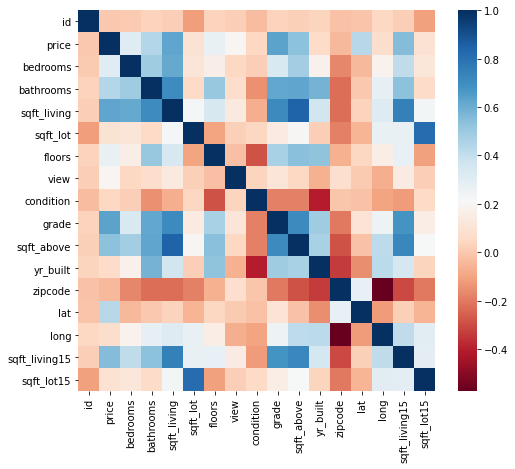

In [41]:
#Looking at the correlation between different columns to check for multicollinearity in a heat map.

#The only really obvious columns with high multcollinearity from this are the redundancy in sq footage, all which will be dropped.

plt.figure(figsize = (8,7))
sns.heatmap(df.corr(), cmap = 'RdBu')

## Binning and Labeling
Here I found the cities and towns that correlated with the zipcodes in the data set off of the King County website and binned them accordingly.  I also took the bedroom and bathroom categories and binned them according to Small, Medium, Large and Massive.  After creating bins for these three columns I went on to create dummy variables for any categorical columns.

In [42]:
bins = [0, 98002, 98005, 98010, 98029, 98039, 98049, 98059, 98079, 98199]

In [43]:
labels = ['Auburn', 'Bellevue', 'Black Diamond', 'Federal Way', 'Kirkland/Kent', 'Pacific', 'Renton', 'Sammammish', 'Seattle']

In [44]:
df['hood'] = pd.cut(df['zipcode'], bins, labels = labels)

In [45]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,hood
date,,,,,,,,,,,,,,,,,,
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,Seattle
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,Sammammish
2014-06-27,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,1995,98003,47.3097,-122.327,2238,6819,Bellevue
2015-04-15,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,1960,98146,47.5123,-122.337,1780,8113,Seattle
2015-03-12,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,2003,98038,47.3684,-122.031,2390,7570,Kirkland/Kent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-19,2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,1180,2008,98116,47.5773,-122.409,1330,1265,Seattle
2014-05-21,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509,Seattle
2015-02-23,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200,Seattle


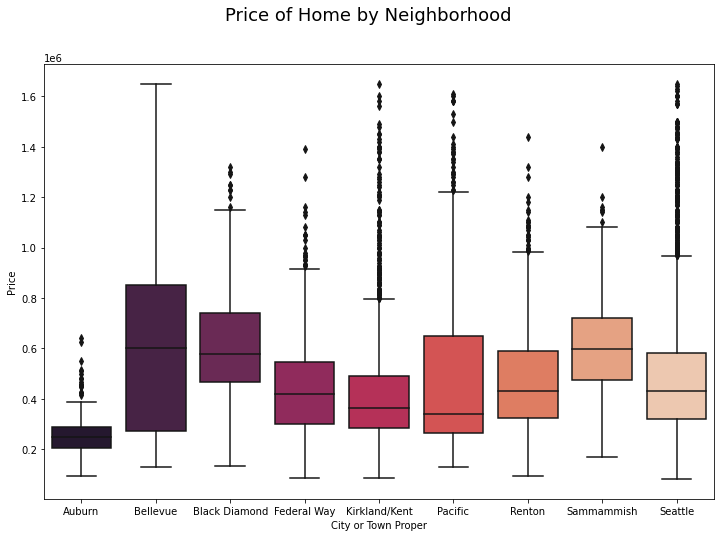

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Price of Home by Neighborhood', fontsize = 18)

sns.boxplot(data = df, x = 'hood', y = 'price', palette = 'rocket')
ax.set(xlabel = 'City or Town Proper', ylabel = 'Price')

plt.show()

These are the bins for the bedrooms:

In [47]:
bins2 = [0, 1, 3, 5, 6]

In [48]:
labels2 = ['Small', 'Medium', 'Large', 'Massive']

In [49]:
df['beds'] = pd.cut(df['bedrooms'], bins = bins2, labels = labels2)

In [50]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,hood,beds
date,,,,,,,,,,,,,,,,,,,
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,Seattle,Large
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,Sammammish,Medium
2014-06-27,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,1995,98003,47.3097,-122.327,2238,6819,Bellevue,Medium
2015-04-15,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,1960,98146,47.5123,-122.337,1780,8113,Seattle,Medium
2015-03-12,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,2003,98038,47.3684,-122.031,2390,7570,Kirkland/Kent,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-19,2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,1180,2008,98116,47.5773,-122.409,1330,1265,Seattle,Medium
2014-05-21,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509,Seattle,Medium
2015-02-23,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200,Seattle,Large


Bins for the bathrooms:

In [51]:
bins3 = [0, 1, 3, 5, 6]

In [52]:
labels3 = ['Small', 'Medium', 'Large', 'Massive']

In [53]:
df['baths'] = pd.cut(df['bathrooms'], bins = bins3, labels = labels3)

In [54]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,hood,beds,baths
date,,,,,,,,,,,,,,,,,,,,
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,Seattle,Large,Medium
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,Sammammish,Medium,Medium
2014-06-27,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,1995,98003,47.3097,-122.327,2238,6819,Bellevue,Medium,Medium
2015-04-15,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,1960,98146,47.5123,-122.337,1780,8113,Seattle,Medium,Small
2015-03-12,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,2003,98038,47.3684,-122.031,2390,7570,Kirkland/Kent,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-19,2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,1180,2008,98116,47.5773,-122.409,1330,1265,Seattle,Medium,Medium
2014-05-21,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509,Seattle,Medium,Medium
2015-02-23,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200,Seattle,Large,Medium


In [55]:
df.drop(['bedrooms', 'bathrooms', 'zipcode'], axis = 1, inplace = True)

In [56]:
df.head()

,id,price,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,hood,beds,baths
date,,,,,,,,,,,,,,,,,
2014-12-09,2487200875,604000.0,1960,5000,1.0,0.0,5,7,1050,1965,47.5208,-122.393,1360,5000,Seattle,Large,Medium
2015-02-18,1954400510,510000.0,1680,8080,1.0,0.0,3,8,1680,1987,47.6168,-122.045,1800,7503,Sammammish,Medium,Medium
2014-06-27,1321400060,257500.0,1715,6819,2.0,0.0,3,7,1715,1995,47.3097,-122.327,2238,6819,Bellevue,Medium,Medium
2015-04-15,2414600126,229500.0,1780,7470,1.0,0.0,3,7,1050,1960,47.5123,-122.337,1780,8113,Seattle,Medium,Small
2015-03-12,3793500160,323000.0,1890,6560,2.0,0.0,3,7,1890,2003,47.3684,-122.031,2390,7570,Kirkland/Kent,Medium,Medium


In [57]:
df = pd.get_dummies(df, columns = ['hood', 'beds', 'baths', 'grade', 'condition', 'view', 'floors'], drop_first = True)

In [58]:
df.shape

(13724, 39)

# Building the Model
**Assumptions Looked At:**
Variance Inflation Factor
<br>
Residual Plots

Homoscedasticity Tests: Brueusch Pagan test.
<br> 
Mean Square Error/ Root Mean Square Error

### Variance Inflation Factor

Variance inflation factor is a way to quantify how much the variance has been inflated when running the model. The error, or variance away from the predictive model inflates with a higher presence of multicollinearity. A variance inflation factor exists for each of the predictors in a multiple regression model.[2] 


When calculating VIF a constant was added. From what I have found there seems to be debate as to whether to use one or not.  Below is the best argument I have found as to why to use one:

A large vif in the constant indicates that the (slope) explanatory variables have also a large constant component. An example would be when a variable has a large mean but only a small variance. An example for perfect collinearity with the constant and rank deficiency of the design matrix is the dummy variable trap, when we did not remove one of the levels of a categorical variable in dummy encoding and the dummies sum to 1 and, therefore, replicate a constant.[3]



In [59]:
#Variance Inflation Factor
#This is some code that I found that checks for the severity of multicollinearity within a regression model.
#A variance inflation factor higher than 5 will show signs of multicollinearity and need to be dropped.

X1 = sm.tools.add_constant(df)

series_before = pd.Series([variance_inflation_factor(X1.values, i ) for i in range(X1.shape[1])], index = X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)


#dropping columns i think will cause problems or that I don't feel like I need.
df_1_after = df.drop(['id', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above', 'baths_Massive', 'grade_7', 'hood_Renton', 'grade_10' ], axis = 1)
X2 = sm.tools.add_constant(df_1_after)
series_after = pd.Series([variance_inflation_factor(X2.values, i ) for i in range(X2.shape[1])], index = X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)

C:\Users\ozbun\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\ozbun\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


DATA BEFORE
----------------------------------------------------------------------------------------------------


const                  0.000000
id                     1.037789
price                  3.445376
sqft_living            6.865654
sqft_lot               3.092263
sqft_above             6.638797
yr_built               3.281335
lat                    1.823325
long                   2.843296
sqft_living15          3.183639
sqft_lot15             3.199293
hood_Bellevue          2.278336
hood_Black Diamond     2.794664
hood_Federal Way       4.916976
hood_Kirkland/Kent     4.883157
hood_Pacific           2.444111
hood_Renton            5.546835
hood_Sammammish        4.531122
hood_Seattle          11.176118
beds_Medium           32.146054
beds_Large            33.239035
beds_Massive           2.312305
baths_Medium           2.219371
baths_Large            2.113968
baths_Massive               NaN
grade_6               10.124410
grade_7               27.776530
grade_8               25.311825
grade_9               14.279349
grade_10               6.665977
grade_11               2.162201
conditio

DATA AFTER
----------------------------------------------------------------------------------------------------


const                 2.655541e+06
price                 2.986607e+00
sqft_living           3.505307e+00
yr_built              3.148909e+00
lat                   1.668795e+00
long                  2.618260e+00
hood_Bellevue         1.290027e+00
hood_Black Diamond    1.286245e+00
hood_Federal Way      1.534674e+00
hood_Kirkland/Kent    1.545360e+00
hood_Pacific          1.245704e+00
hood_Sammammish       1.594213e+00
hood_Seattle          3.683633e+00
beds_Medium           3.126166e+01
beds_Large            3.235380e+01
beds_Massive          2.270997e+00
baths_Medium          2.126952e+00
baths_Large           2.055246e+00
grade_6               1.353026e+00
grade_8               1.367203e+00
grade_9               1.570324e+00
grade_11              1.120082e+00
condition_3           3.080860e+01
condition_4           2.655885e+01
condition_5           1.084101e+01
view_1.0              1.032606e+00
view_2.0              1.063889e+00
floors_1.5            1.261041e+00
floors_2.0          

In [60]:
### Turning the price category into a log10 transformation to ensure that the price data is not 
###skewed without dropping more outliers.  
##This should also help result in a high R2.  

In [61]:
df_1_after['price_log'] = np.log10(df_1_after['price'])

## Testing and training data - Linear Regression

In [62]:
# Setting out X and y equal to their respective columns.
X = df_1_after.drop('price_log', axis = 1)
y = df_1_after[['price_log']]

#Split dataset into training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#create instance of our model
regression_model = LinearRegression()
#fit the model
regression_model.fit(X_train, y_train)

LinearRegression()

In [63]:
len(X_test)

2745

In [64]:
y_hat_train = regression_model.predict(X_train)
y_hat_test = regression_model.predict(X_test)

In [65]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

### Mean Square Error

In [66]:
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: 0.0024266365389152295
Test MSE: 0.002365921136334791


### Root Mean Square Error

In [67]:
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

RMSE Train: 0.04926090274157823
RMSE Test: 0.048640735359724886


In [68]:
residual = y_test - y_hat_test

In [69]:
#plot for residuals was skewed left heavily before changing the price to a log transformation.

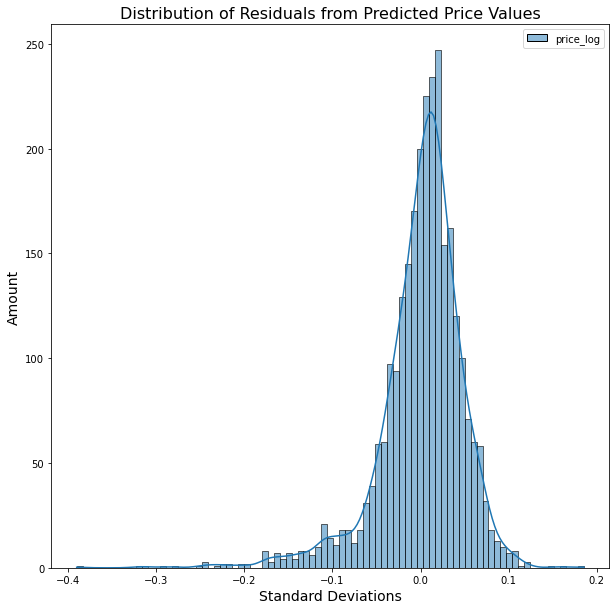

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(residual, kde = True, ax=ax)
plt.title('Distribution of Residuals from Predicted Price Values', fontsize = 16)
plt.xlabel('Standard Deviations', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

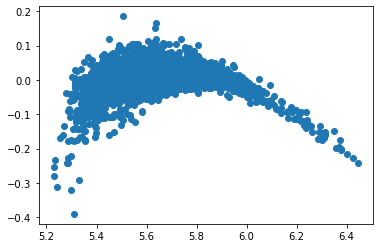

In [71]:
plt.scatter(y_hat_test, residual)

In [72]:
r2_score(y_test, y_hat_test)

0.9404136914236082

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00016
Feature: 3, Score: 0.19800
Feature: 4, Score: 0.05461
Feature: 5, Score: 0.01112
Feature: 6, Score: 0.02288
Feature: 7, Score: 0.00349
Feature: 8, Score: 0.00333
Feature: 9, Score: 0.01122
Feature: 10, Score: 0.00992
Feature: 11, Score: 0.01021
Feature: 12, Score: 0.03555
Feature: 13, Score: 0.03717
Feature: 14, Score: 0.02961
Feature: 15, Score: 0.02172
Feature: 16, Score: 0.00291
Feature: 17, Score: 0.03394
Feature: 18, Score: 0.02393
Feature: 19, Score: 0.01498
Feature: 20, Score: 0.04875
Feature: 21, Score: 0.03657
Feature: 22, Score: 0.04012
Feature: 23, Score: 0.04050
Feature: 24, Score: 0.00448
Feature: 25, Score: 0.00506
Feature: 26, Score: 0.01232
Feature: 27, Score: 0.00994
Feature: 28, Score: 0.00547
Feature: 29, Score: 0.00942


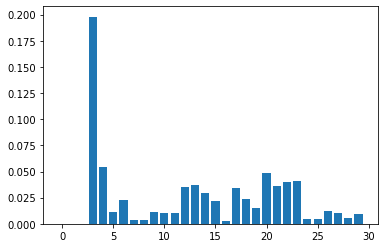

In [73]:
# get importance
importance = np.abs(regression_model.coef_[0])
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Fitting the final model - OLS Method.

In [74]:
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1)
est = model.fit()

### Homoscedasticity Checks:
Homoscedasticity checks using Breusch-Pagan test:


**Null Hypothesis:**  All error variances are equal <br>
**Alternative Hypothesis:**  Error variances are not equal, i.e.: The more that Y increases, X also increases or decreases causing a conical shape.  

We want for our null hypothesis to be true!  If Homoscedasticity is violated, it means we have a high presence of multicollinearity. 

Note the problem with this test is that the error variances could be caused by something other than the linear function itself.

In [75]:
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
## This is great! We can reject the null hypothesis and say that our model is Heteroscedastic as opposed to homosceadstic.
# We can see this visually below. 

0.0 0.0


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

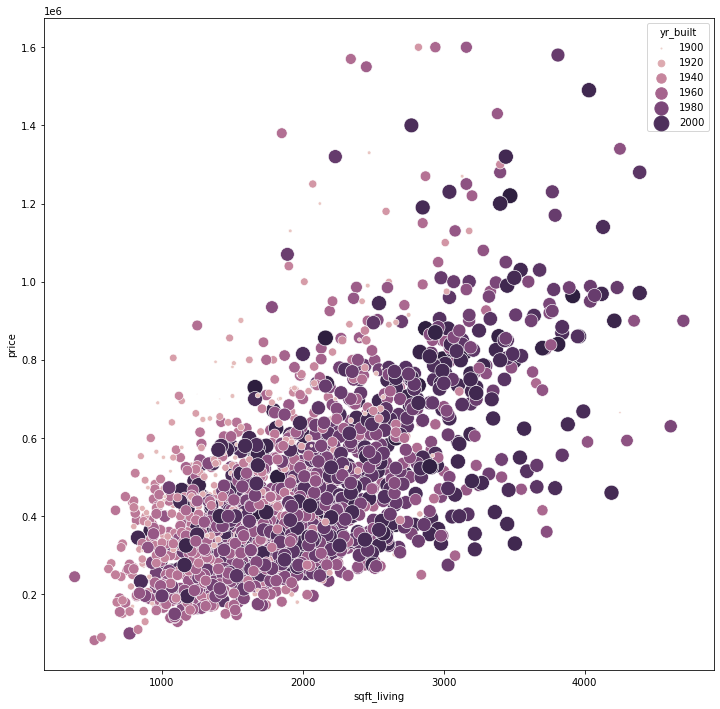

In [76]:
fig, axes = plt.subplots(figsize = (12, 12))
sns.scatterplot(data = df.iloc[200:2000], x = 'sqft_living', y = 'price', hue = 'yr_built', size = 'yr_built', sizes = (1,250))

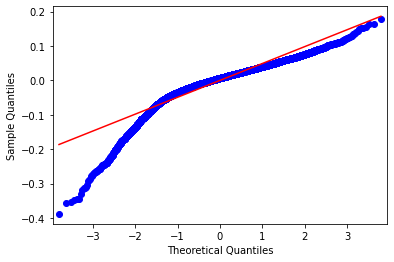

Mean: 1.140764978512912e-11


In [77]:
#check for the normality of the residuals
sm.qqplot(est.resid, line = 's')
pylab.show()

#check that the mean of the residuals is approx. 0
mean_residuals = sum(est.resid) / len(est.resid)
print("Mean:", mean_residuals)

In [78]:
##The final model:

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     7139.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:47:51   Log-Likelihood:                 21885.
No. Observations:               13724   AIC:                        -4.371e+04
Df Residuals:                   13693   BIC:                        -4.347e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2852      0

# Summary

In summation there is still work to be done.  We can begin to narrow the search down to specific neighborhoods, specific number of bedrooms and bathrooms, and looking into cost of materials.   

Our final Mean Squared Error was very low at:
Train MSE: 0.0024528585796936126
Test MSE: 0.0022605332270518494 
R2 score was was extremely high at 0.975.

Taking the natural log of our y variable (The price of the home), allowed for a higher performing model.

QQ plot is the main thing that seems a little off.  With an R2 this high the QQ plot should be hugging our line of best fit a little bit better.  I am going to guess that our left skew is throwing this off still.

# References

[1] https://www.appraisalbuzz.com/quality-vs-condition/ <br>
[2] https://www.statisticshowto.com/multicollinearity/<br>
[3] https://stackoverflow.com/questions/59694427/what-does-the-high-vif-for-the-constant-term-intercept-indicate